In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx")

In [4]:
Industry_Portfolio.set_index("Date",inplace=True)

### Mean return and standard deviation of return

In [5]:
Summary = pd.DataFrame({"Mean":Industry_Portfolio.mean(),"Std":Industry_Portfolio.std()})
Summary

,Mean,Std
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [6]:
R=pd.DataFrame(data=Industry_Portfolio.mean(axis=0))

V=Industry_Portfolio.cov()

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

e = pd.DataFrame(data=np.ones((Industry_Portfolio.shape[1], 1)), 
                 index=Industry_Portfolio.columns, 
                 columns=["Dummy"])

In [7]:
# Compute Alpha
Alpha = (R.T @ V_inv @ e).values[0, 0]

# Compute Zeta
Zeta = (R.T @ V_inv @ R).values[0, 0]

# Compute Delta
Delta = (e.T @ V_inv @ e).values[0, 0]

In [8]:
# Compute 'a'
numerator_a1 = (Zeta * V_inv @ e)
numerator_a2 = (Alpha * V_inv @ R)
numerator_a = numerator_a1.values - numerator_a2.values
denominator_a = (Zeta * Delta) - Alpha**2
a = numerator_a / denominator_a

In [9]:
# Compute 'b'
numerator_b1 = (Delta * V_inv @ R)
numerator_b2 = (Alpha * V_inv @ e)
numerator_b = numerator_b1.values - numerator_b2.values
denominator_b = (Zeta * Delta) - Alpha**2
b = numerator_b / denominator_b

In [10]:
# Create the DataFrame with a range of portfolio returns as the index
returns_range = np.arange(0, 2, 0.001)
Minimum_Varaince_Frontier = pd.DataFrame(index=returns_range, columns=Industry_Portfolio.columns)

# Fill the DataFrame with weights based on the formula
for portfolio_return in returns_range:
    weights = a + b * portfolio_return
    Minimum_Varaince_Frontier.loc[portfolio_return, :] = weights.T

In [11]:
R_mv=Alpha/Delta

In [12]:
Minimum_Varaince_Frontier["Variance"]=(1/Delta)+(Delta/(Zeta*Delta-Alpha**2))*(Minimum_Varaince_Frontier.index-R_mv)**2
Minimum_Varaince_Frontier["SD"]=np.sqrt(Minimum_Varaince_Frontier["Variance"])

### Minimum-variance frontier (without the riskless asset) 

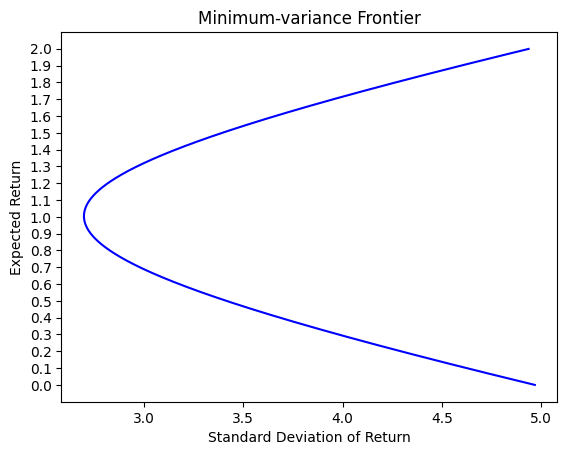

In [13]:
plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier')
plt.show() 

### Economic significance and relevance of the minimum-variance frontier

The minimum variance frontier illustrates the minimum volatility achievable by a portfolio, for a given amount of expected return. Assuming that investors are risk-adverse and likes high returns but dislikes high risk, the minimum variance frontier would inform the investor what is the minimum volatility he can expect, for a given amount of expected return. Assuming that the risky assets that are available to the investor are not perfectly correlated with each other, by combining the assets and diversifying his investments, the investor is able to achieve better risk-adjusted returns compared to any one individual asset. At the same time, there are limits to diversification, any portfolios to the left of the minimum variance frontier are unachievable with any combinations of the current risky assets.

The minimum variance frontier also helps the investor in finding the global minimum-variance portfolio, which is the lowest volatility portfolio available (assuming no riskless asset), that the investor can achieve by combining the individual assets. The minimum variance frontier also helps the investor find the efficient frontier, which is the portfolio with the highest expected return for a given amount of volatility (to be elaborated on in later sections).

In [14]:
rf=0.13

In [15]:
# Note that the np.arrange is supposed to be portfolio standard deviation (the x-axis)
Risk_free_line = rf + np.arange(0, 6, 0.001)*(Zeta-2*Alpha*rf+Delta*(rf**2))**0.5

In [16]:
Minimum_Varaince_Frontier["Riskless_Variance"]=((Minimum_Varaince_Frontier.index-rf)**2)/(Zeta - 2*Alpha*rf + Delta*(rf**2))
Minimum_Varaince_Frontier["Riskless_SD"]=np.sqrt(Minimum_Varaince_Frontier["Riskless_Variance"])
Minimum_Varaince_Frontier["Riskless_SD"] = (Minimum_Varaince_Frontier.index-rf)/np.sqrt(Zeta - 2*Alpha*rf + Delta*(rf**2))

### Efficient frontier (with the riskless asset)

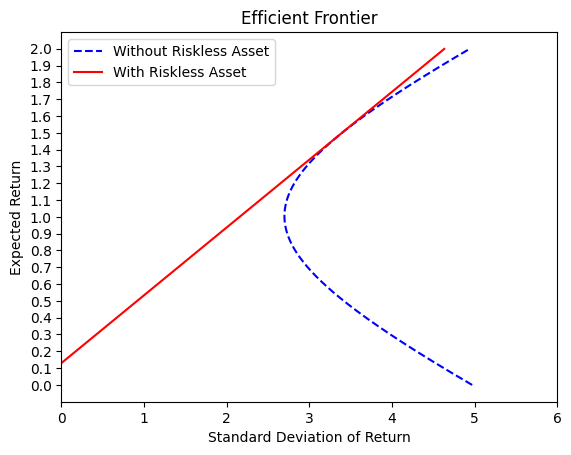

In [17]:
plt.plot(Minimum_Varaince_Frontier["SD"], Minimum_Varaince_Frontier.index, color='blue', linestyle='--', label = "Without Riskless Asset")
plt.plot(Minimum_Varaince_Frontier["Riskless_SD"], Minimum_Varaince_Frontier.index, color='red', linestyle='-', label = "With Riskless Asset")

plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlim(0,6)
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

### Economic significance and relevance of the efficient frontier

The efficent frontier illustrates what is the maximum expected return achievable by an investor for a given amount of risk. By including a riskless asset in addition to the portfolio of risky assets, the investor is able to push out the efficient frontier compared with the case when he only had risky assets, as he is now able to borrow or lend at the risk-free rate to invest more or less in the tangency portfolio, as needed. Assuming that the investor is risk adverse, likes return but dislike risk, he would choose a portfolio along the efficient frontier that maximizes his personal utility function, which is the point where his indifference curve is tangent to the efficient frontier. Any portfolio below the efficient frontier offers lower expected return for a similar amount of risk and the risk adverse investor would not choose such a portfolio when there is another portfolio available that offers higher return with similar amount of risk. Conversely, any portfolio above the efficient frontier is not achievable given the current universe of risky assets available to the investor.

### Sharpe ratio for the tangency portfolio

In [18]:
Sharpe = np.sqrt(Zeta - 2*Alpha*rf + Delta*rf**2)
Sharpe

0.40356559934950903

In [19]:
print (f'The Sharpe ratio of the tangency portfolio is {Sharpe:.3f}')

The Sharpe ratio of the tangency portfolio is 0.404


In [20]:
R_tg = (Alpha*rf - Zeta)/(Delta*rf - Alpha)

In [21]:
w_star = a + b*R_tg

### Tangency portfolio weights for the ten industry portfolios.

In [22]:
Tangency_portfolio=pd.DataFrame(data=w_star,index=Industry_Portfolio.columns,columns=["Optimal_Weights"])
Tangency_portfolio

,Optimal_Weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


### Economic significance and relevance of the tangency portfolio

The tangency portfolio can be found at the point where the capital allocation line is tangent to the efficient frontier created by combining the risky assets. By combining a riskless asset with the existing portfolio of risky assets, a new efficient frontier is created as a straight line starting from the risk-free rate to the tangency point and continuing beyond that. The tangency portfolio illustrates the portfolio with maximum Sharpe ratio achievable by an investor by combining risky assets with a riskless asset. As risk-adverse investors likes return but dislike risk, he would want the best possible "reward-to-risk" on his investment portfolio and choose a portfolio along this efficient frontier which combines a risk-free bond and the tangency portfolio which also gives the best Sharpe. If an investor's optimal portfolio (considering his utility function) is to the left of the tangency portfolio, the investor will invest part of his wealth in the risk-free bond and part of his wealth in the tangency portfolio. If an investor's optimal portfolio (considering his utility function) is to the right of the tangency portfolio, the investor will borrow at the risk-free rate and invest more than 100% of his wealth in the tangency portfolio. Any combination of borrowing/lending and investing in the tangency portfolio will give the investor the same (maximum possible) Sharpe ratio.